In [1]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

pd.options.display.float_format = '{:,.2f}'.format

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

import PortfolioLab as pl

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

In [2]:
ISINs = ['IE00B18GC888', 'IWDA', 'XAD5']
Nomes = ['VG_GB', 'IWDA', 'XAD5']

fundos = pd.read_csv('D:/GDrive/_GitHub/Backtester/Data/Cotacoes_diarias.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()
fundos = pl.normalize(fundos)

Begin = str(fundos.iloc[0].name)[0:10]
End = str(fundos.iloc[-1].name)[0:10]

In [3]:
returns = fundos.pct_change()

### Comparação de carteiras "modelo" de ETFs (usando Vanguard Global Bond e IWDA)

In [4]:
pl.print_title('Análise desde ' +  Begin + ' até ' + End)

**Análise desde 2014-02-27 até 2020-09-22**

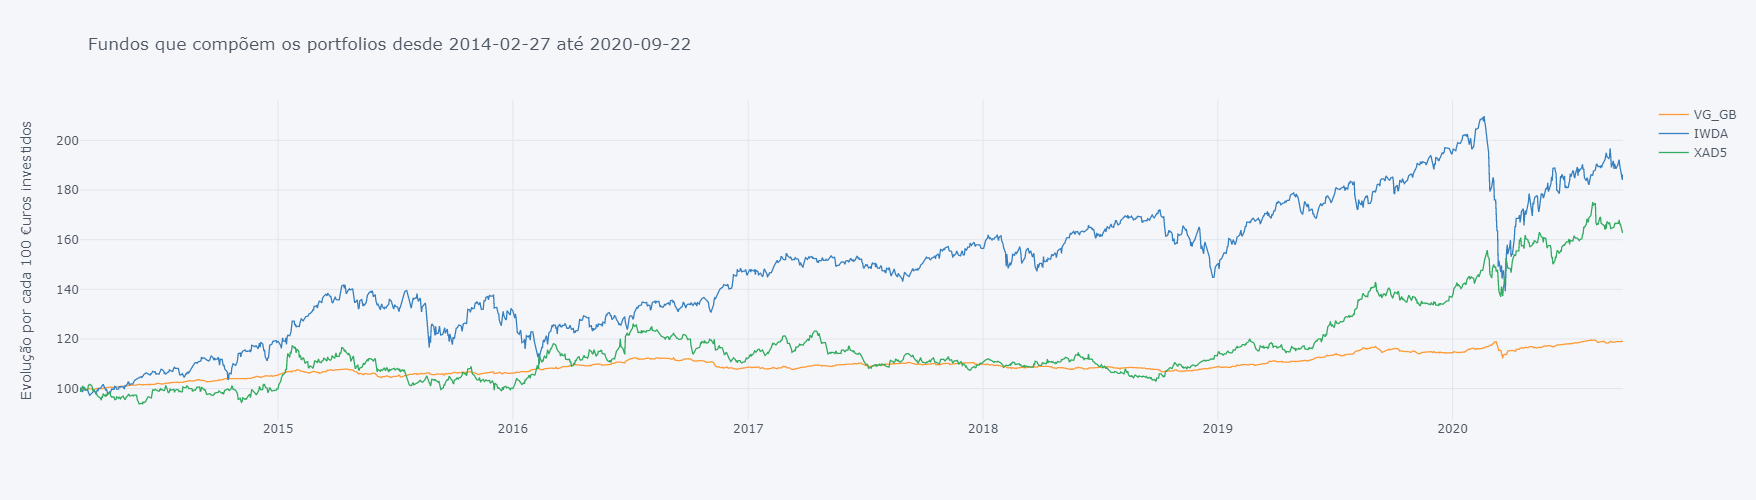

In [5]:
fundos.iplot(dimensions=pl.dimensions, title='Fundos que compõem os portfolios desde ' +  Begin + ' até ' + End,
             yTitle='Evolução por cada 100 €uros investidos')

In [7]:
nr = 0

pl.compute_performance_table(fundos)

**Performance from 2014-02-27 to 2020-09-22 (≈ 6.6 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
VG_GB,2.68%,18.99%,2.65%,1.01,-5.57%,0.48
IWDA,9.93%,86.37%,16.71%,0.59,-33.63%,0.30
XAD5,7.71%,62.99%,12.56%,0.61,-18.43%,0.42


### Tabela de correlação dos retornos dos ETFs

In [8]:
returns.corr()

,VG_GB,IWDA,XAD5
VG_GB,1.00,-0.14,0.29
IWDA,-0.14,1.00,0.06
XAD5,0.29,0.06,1.00


In [9]:
from pandas.tseries.offsets import DateOffset
plus_1_year = returns.iloc[0].name + DateOffset(years=1)

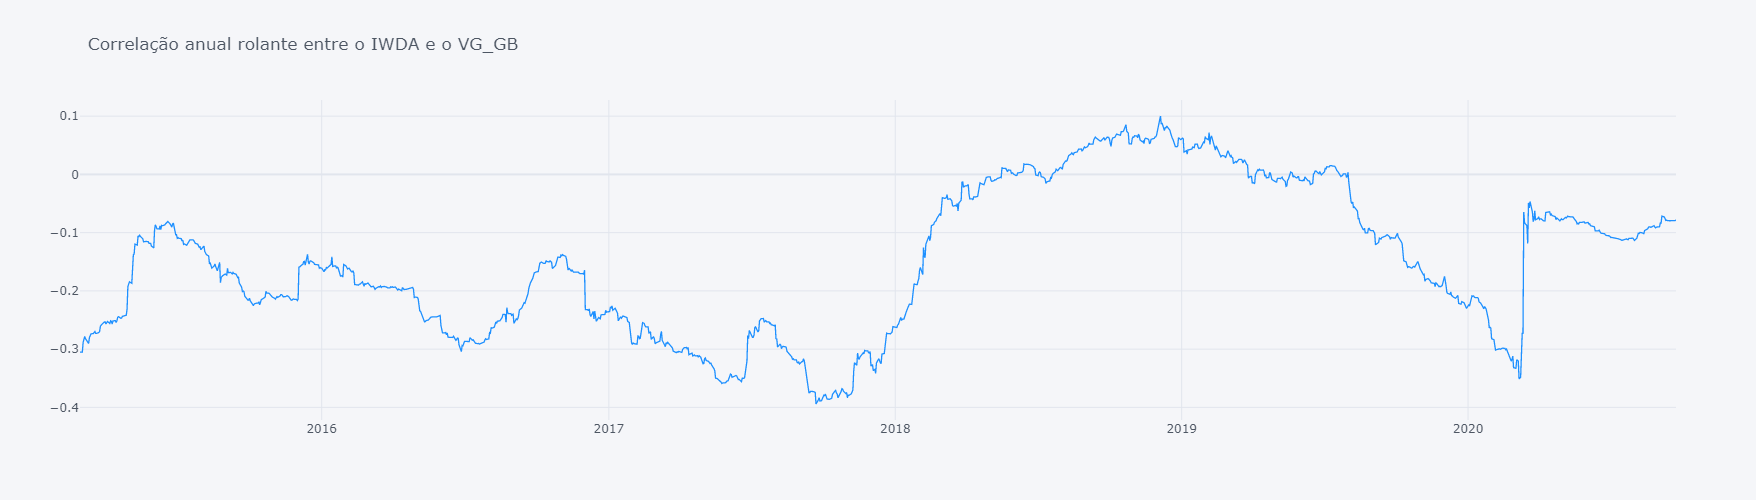

In [11]:
returns['VG_GB'].rolling("365D").corr(returns['IWDA'])[plus_1_year:].iplot(dimensions=pl.dimensions, color='dodgerblue', title="Correlação anual rolante entre o IWDA e o VG_GB")

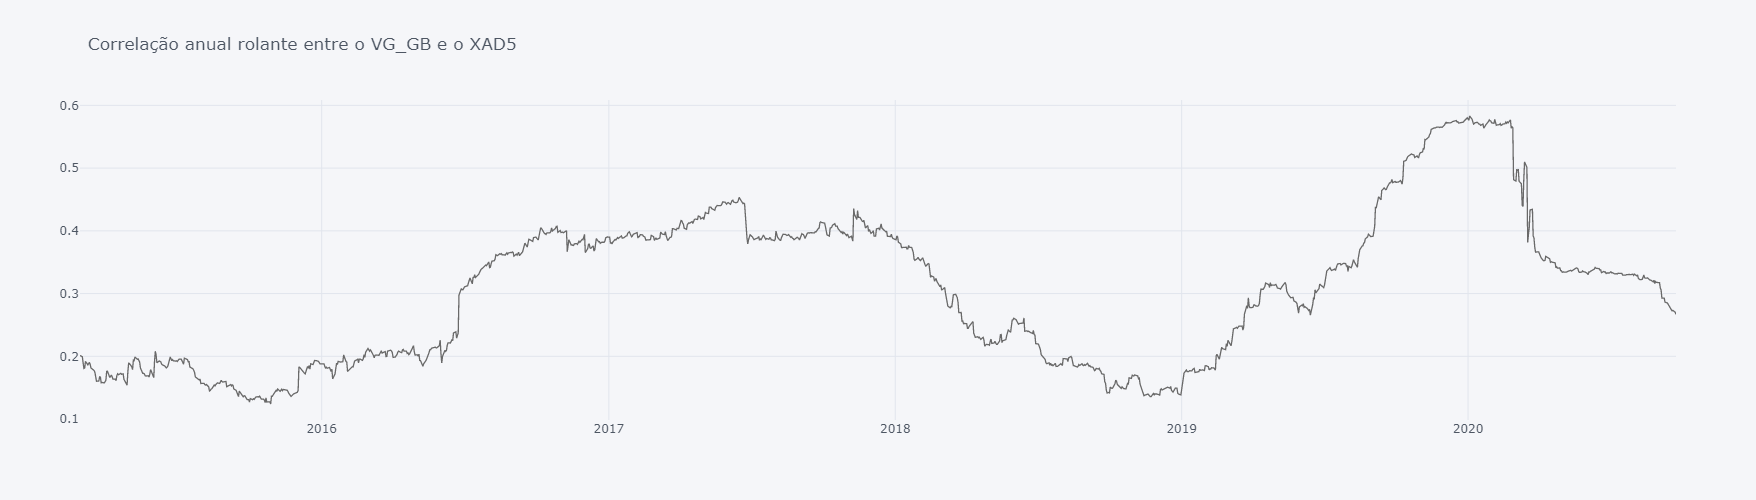

In [12]:
returns['VG_GB'].rolling("365D").corr(returns['XAD5'])[plus_1_year:].iplot(dimensions=pl.dimensions, color='dimgrey', title="Correlação anual rolante entre o VG_GB e o XAD5")

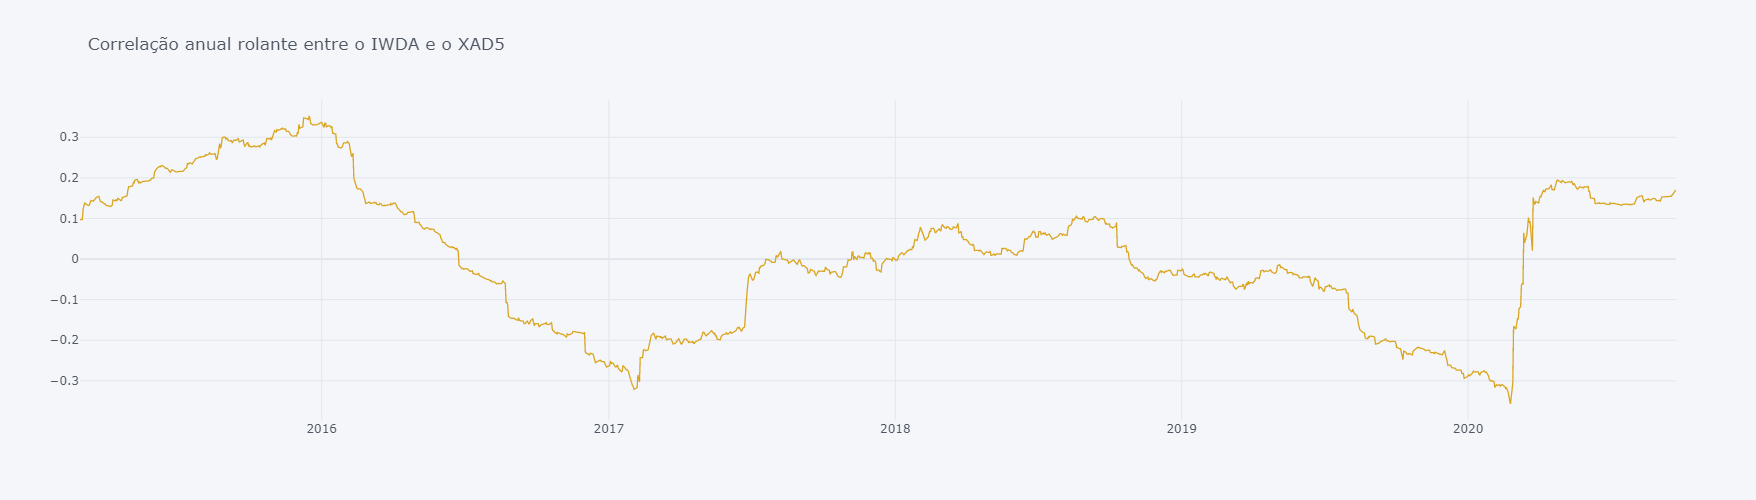

In [69]:
returns['IWDA'].rolling("365D").corr(returns['XAD5'])[plus_1_year:].iplot(dimensions=pl.dimensions, color='goldenrod', title="Correlação anual rolante entre o IWDA e o XAD5")

Nos gráficos podemos ver que a correlação não é algo estático e em períodos de crise pode sofrer alterações significativas, seja um aumento ou dimínuição da correlação , como vimos este ano de 2020.

In [19]:
conservador = pl.compute_portfolio(fundos, [0.7, 0.2, 0.1])
moderado = pl.compute_portfolio(fundos, [0.4, 0.4, 0.2])
agressivo = pl.compute_portfolio(fundos, [0.2, 0.6, 0.2])

In [20]:
portfolios = pl.merge_time_series(conservador, moderado)
portfolios = pl.merge_time_series(portfolios, agressivo)

In [21]:
portfolios.columns = ['Cons.', 'Mod.', 'Agr.'] 

### Portfolios:

- Portfolio Conservador:
    - 70% Vanguard Global Bond - [Homepage](https://global.vanguard.com/portal/site/kiids/pt/pt/documents) // [Kiid](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=10417)
    - 20% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 10% Physical Gold) - [Homepage](https://etc.dws.com/GBR/ENG/ETC/Productdetails/DE000A1E0HR8)
    
    
- Portfolio Moderado:
    - 40% Vanguard Global Bond - [Homepage](https://global.vanguard.com/portal/site/kiids/pt/pt/documents) // [Kiid](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=10417)
    - 40% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 20% Physical Gold) - [Homepage](https://etc.dws.com/GBR/ENG/ETC/Productdetails/DE000A1E0HR8)
    
    
- Portfolio Agressivo:
    - 20% Vanguard Global Bond - [Homepage](https://global.vanguard.com/portal/site/kiids/pt/pt/documents) // [Kiid](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=10417)
    - 60% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 20% Physical Gold) - [Homepage](https://etc.dws.com/GBR/ENG/ETC/Productdetails/DE000A1E0HR8)

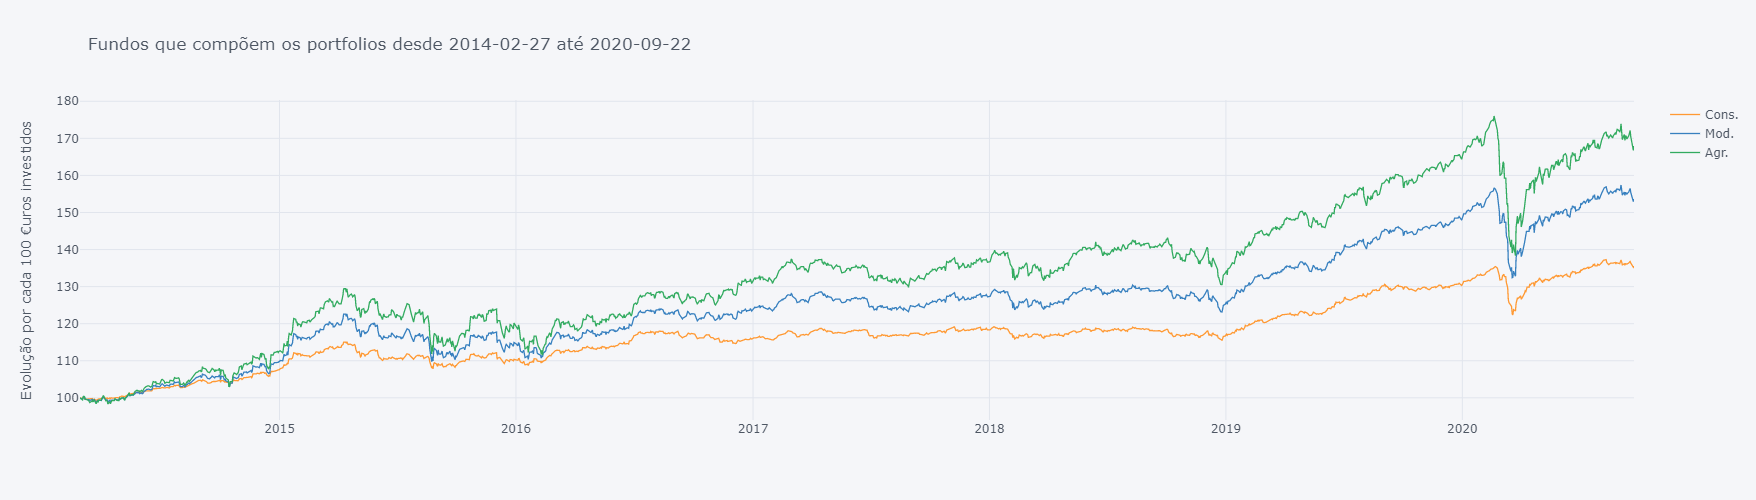

In [23]:
portfolios.iplot(dimensions=pl.dimensions, title='Fundos que compõem os portfolios desde ' +  Begin + ' até ' + End,
             yTitle='Evolução por cada 100 €uros investidos')

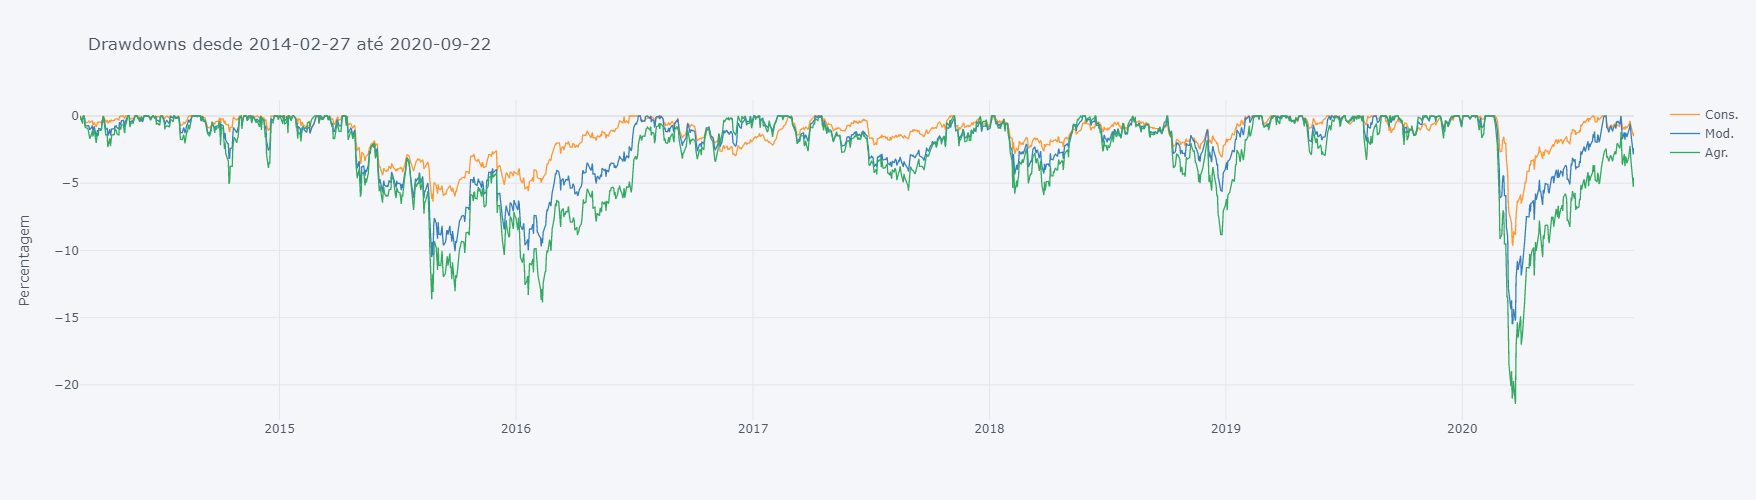

In [25]:
round(pl.compute_drawdowns(portfolios), 2).iplot(dimensions=pl.dimensions, title='Drawdowns desde ' +  Begin + ' até ' + End, yTitle='Percentagem')

In [27]:
pl.compute_performance_table(portfolios)

**Performance from 2014-02-27 to 2020-09-22 (≈ 6.6 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
Cons.,4.73%,35.53%,3.99%,1.19,-9.65%,0.49
Mod.,6.75%,53.62%,7.21%,0.94,-15.47%,0.44
Agr.,8.20%,67.93%,10.27%,0.80,-21.42%,0.38


In [29]:
pl.compute_performance_table(portfolios, years=1)

**Performance from 2019-09-20 to 2020-09-22 (1 year)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
Cons.,4.29%,4.29%,5.75%,0.74,-9.65%,0.44
Mod.,5.33%,5.33%,10.49%,0.50,-15.47%,0.34
Agr.,4.79%,4.79%,15.14%,0.31,-21.42%,0.22


In [30]:
pl.compute_performance_table(portfolios, years=3)

**Performance from 2017-09-22 to 2020-09-22 (3 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
Cons.,5.06%,15.97%,4.28%,1.18,-9.65%,0.52
Mod.,7.32%,23.60%,7.54%,0.97,-15.47%,0.47
Agr.,8.38%,27.30%,10.82%,0.77,-21.42%,0.39


In [31]:
pl.compute_performance_table(portfolios, years=5)

**Performance from 2015-09-22 to 2020-09-22 (5 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
Cons.,4.46%,24.41%,3.95%,1.13,-9.65%,0.46
Mod.,6.57%,37.47%,7.01%,0.94,-15.47%,0.42
Agr.,7.90%,46.24%,10.05%,0.78,-21.42%,0.37


In [41]:
pl.compute_yearly_returns(fundos, color=True)

**Yearly Returns**

,2015,2016,2017,2018,2019,2020
VG_GB,0.59%,2.37%,1.17%,-1.22%,5.27%,4.17%
IWDA,10.32%,10.87%,7.49%,-4.16%,29.58%,-4.13%
XAD5,0.14%,12.00%,-1.85%,2.96%,20.87%,19.11%


### Questão: Existe o equivalente ao Vanguard Global bond index fund (IE00BGCZ0933) em versão ETF?

In [55]:
ISINs = ['IE00B18GC888', 'VAGF']
Nomes = ['VG_GB', 'VAGF']

fundos = pd.read_csv('D:/GDrive/_GitHub/Backtester/Data/Cotacoes_diarias_all.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()
fundos = pl.normalize(fundos)

Begin = str(fundos.iloc[0].name)[0:10]
End = str(fundos.iloc[-1].name)[0:10]

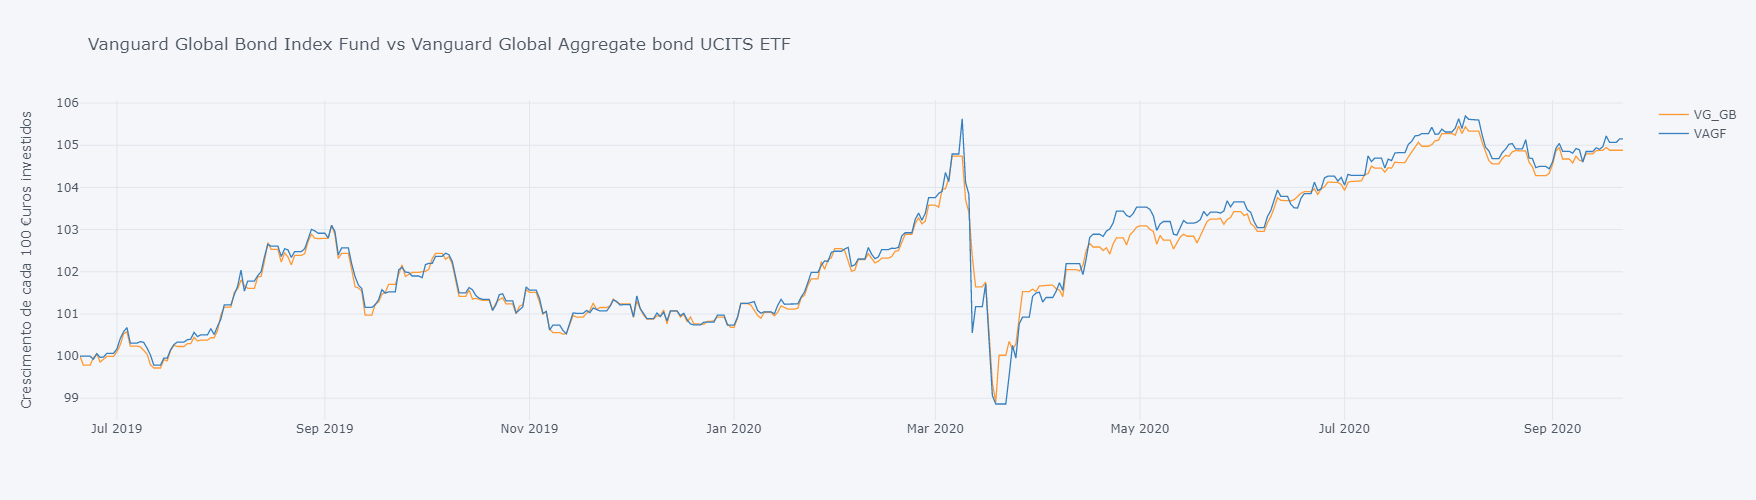

In [57]:
fundos.iplot(dimensions=pl.dimensions, title = 'Vanguard Global Bond Index Fund vs Vanguard Global Aggregate bond UCITS ETF',
            yTitle='Crescimento de cada 100 €uros investidos')

Os activos parecem ser suficientemente semelhantes para se poder usar qualquer um deles.

## Comparação do Vanguard Global Bond com o Xtrackers II Global Government Bond UCITS ETF 1C - EUR Hedged

In [61]:
# Downloading funds and creating quotes and returns dataframes
Begin = '2000-03-10'
# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

Tickers =  ['DBZB.XETRA']

ETFs = pd.DataFrame()

# Download
for ticker in Tickers:
    url = "https://eodhistoricaldata.com/api/eod/" + str(ticker) + "?api_token=5c982bff80deb2.22427269&period=d."
    ETF = pd.read_csv(url, index_col = 'Date', parse_dates = True)[['Adjusted_close']].iloc[:-1, :]
    ETFs = ETFs.merge(ETF, left_index = True, right_index = True, how='outer')
    
ETFs.columns = Tickers
ETFs = ETFs.fillna(method='ffill')
ETFs = ETFs.replace(to_replace=0, method='ffill')
ETFs.columns = ['DBZB']

ISINs = ['IE00B18GC888']
Nomes = ['VG_GB']

fundos = pd.read_csv('D:/GDrive/_GitHub/Backtester/Data/Cotacoes_diarias_all.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()

Begin = str(fundos.iloc[0].name)[0:10]
End = str(fundos.iloc[-1].name)[0:10]

fundos = pl.merge_time_series(ETFs, fundos, how='inner')
fundos = pl.normalize(fundos)

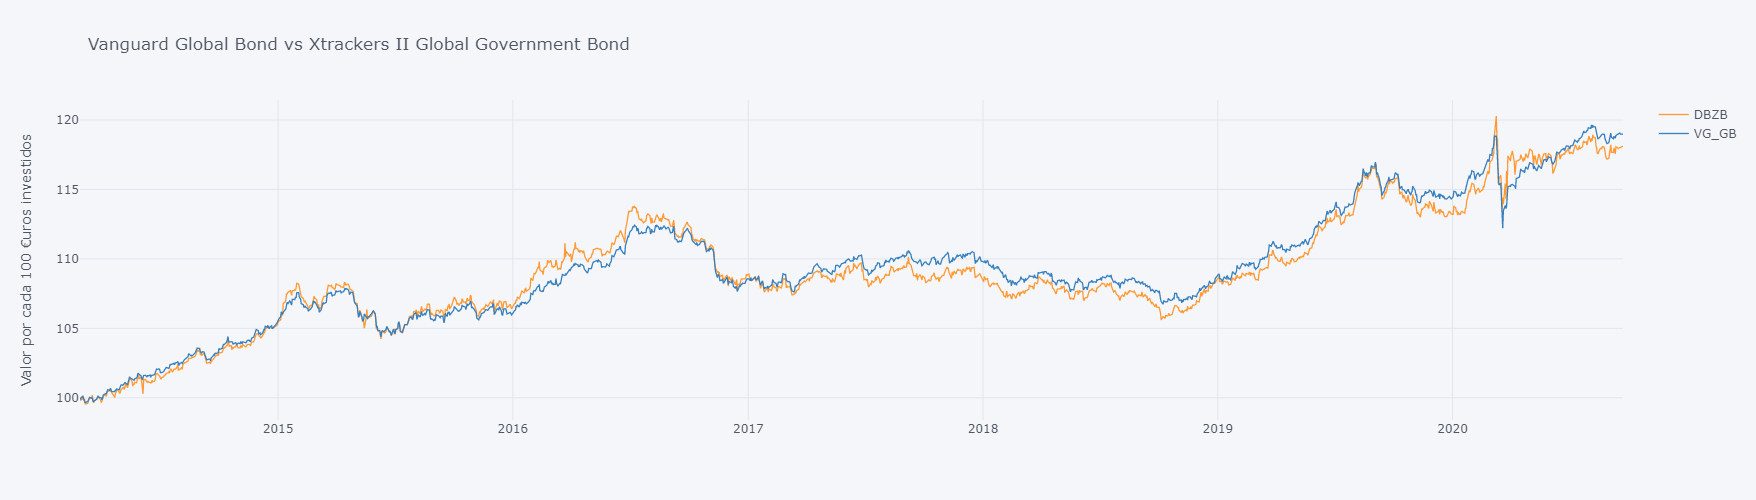

In [62]:
fundos.iplot(dimensions=pl.dimensions,
             title= 'Vanguard Global Bond vs Xtrackers II Global Government Bond',
             yTitle='Valor por cada 100 €uros investidos')

In [64]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF